In [1]:
from typing import List, Any

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import quantstats_lumi as qs
import requests
import math
import utils

from tqdm import tqdm

sns.set_palette(sns.color_palette("hls", 12))

plt.style.use("ggplot")

In [2]:
data = pd.read_excel("FTSEMIB_tickers.xlsx")

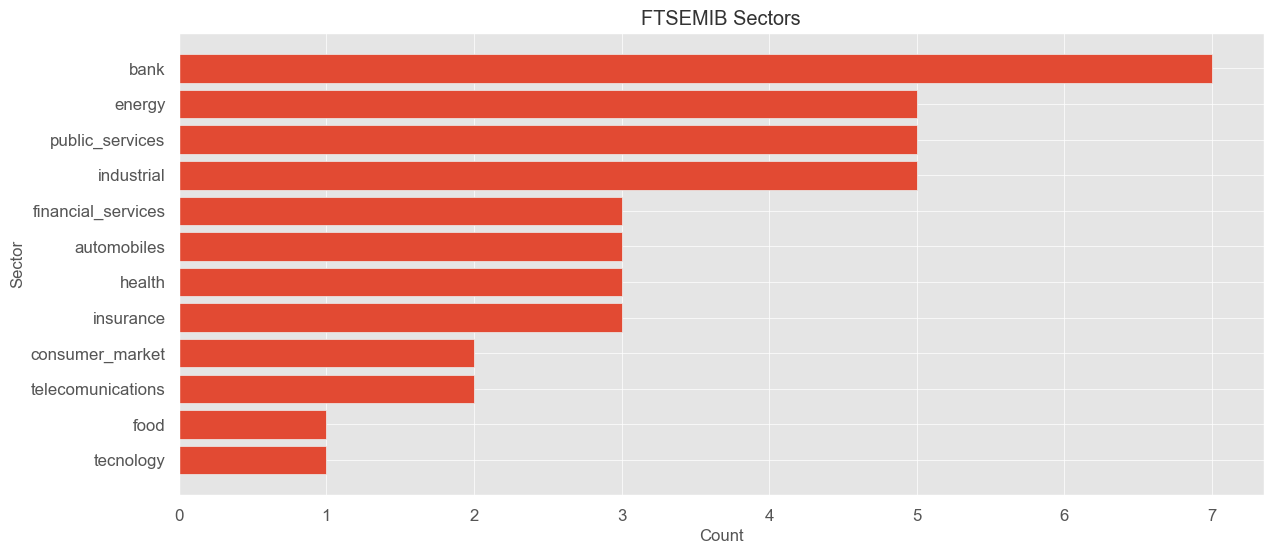

In [3]:
count = data["sector"].value_counts()[::-1]

fig, ax = plt.subplots(figsize=(14, 6))

ax.barh(count.index, count.values)
ax.set_ylabel("Sector")
ax.set_xlabel("Count")
ax.set_title("FTSEMIB Sectors")
plt.show()

In [4]:
previousClose = []
marketCap = []
shares = []

for stock in tqdm(data["ticker"]):
    ticker = yf.Ticker(stock)
    previousClose.append(ticker.fast_info["previousClose"])
    marketCap.append(ticker.fast_info["marketCap"])
    shares.append(ticker.fast_info["shares"])
        
data["previousClose"] = previousClose
data["marketCap"] = marketCap
data["shares"] = shares
data.sort_values(by=["sector", "marketCap"], ascending=[True, False], inplace=True)

starting_period = "2014-01-01"
returns_dict = {}
for ticker in data["ticker"]:
    returns_dict[ticker] = qs.utils.download_returns(ticker).loc[starting_period:]
    
avg_return = []
volatility = []
max_drawdown = []
for ticker in data["ticker"]:
    avg_return.append(qs.stats.avg_return(returns_dict[ticker]))
    volatility.append(qs.stats.volatility(returns_dict[ticker]))
    max_drawdown.append(qs.stats.max_drawdown(returns_dict[ticker]))
    
data["avg_return"] = avg_return
data["volatility"] = volatility
data["max_drawdown"] = max_drawdown

100%|██████████| 40/40 [00:11<00:00,  3.42it/s]
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 o

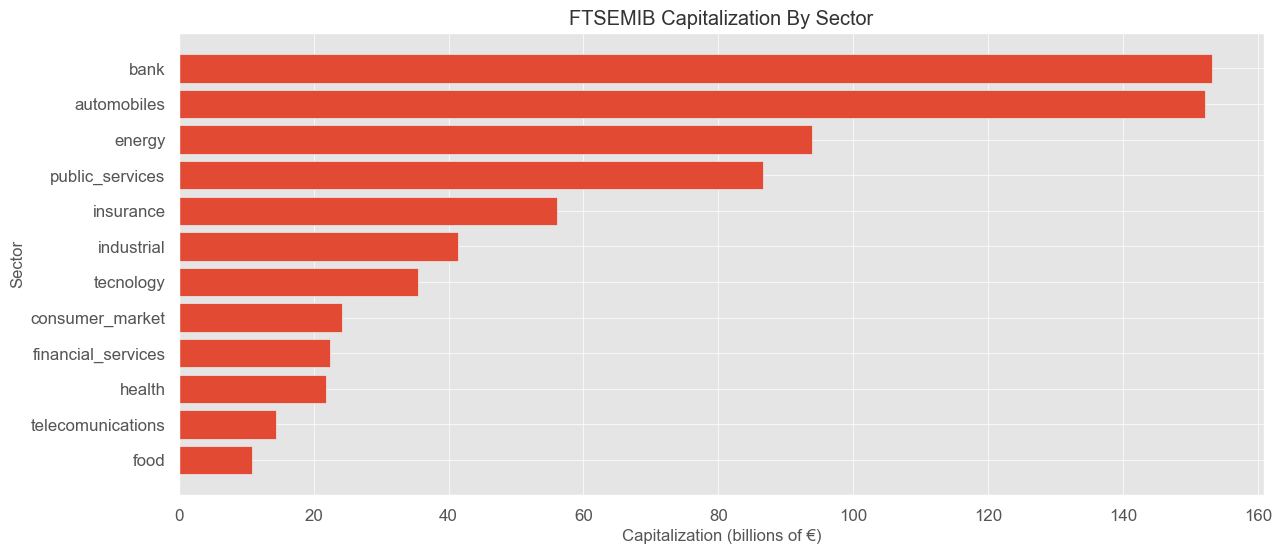

In [5]:
sector_capitalization = data[["sector", "marketCap"]].groupby("sector").sum()
sector_capitalization.sort_values(by="marketCap", ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(14, 6))

ax.barh(sector_capitalization.index, sector_capitalization["marketCap"].values / 1_000_000_000)
ax.set_ylabel("Sector")
ax.set_xlabel("Capitalization (billions of €)")
ax.set_title("FTSEMIB Capitalization By Sector")
plt.show()

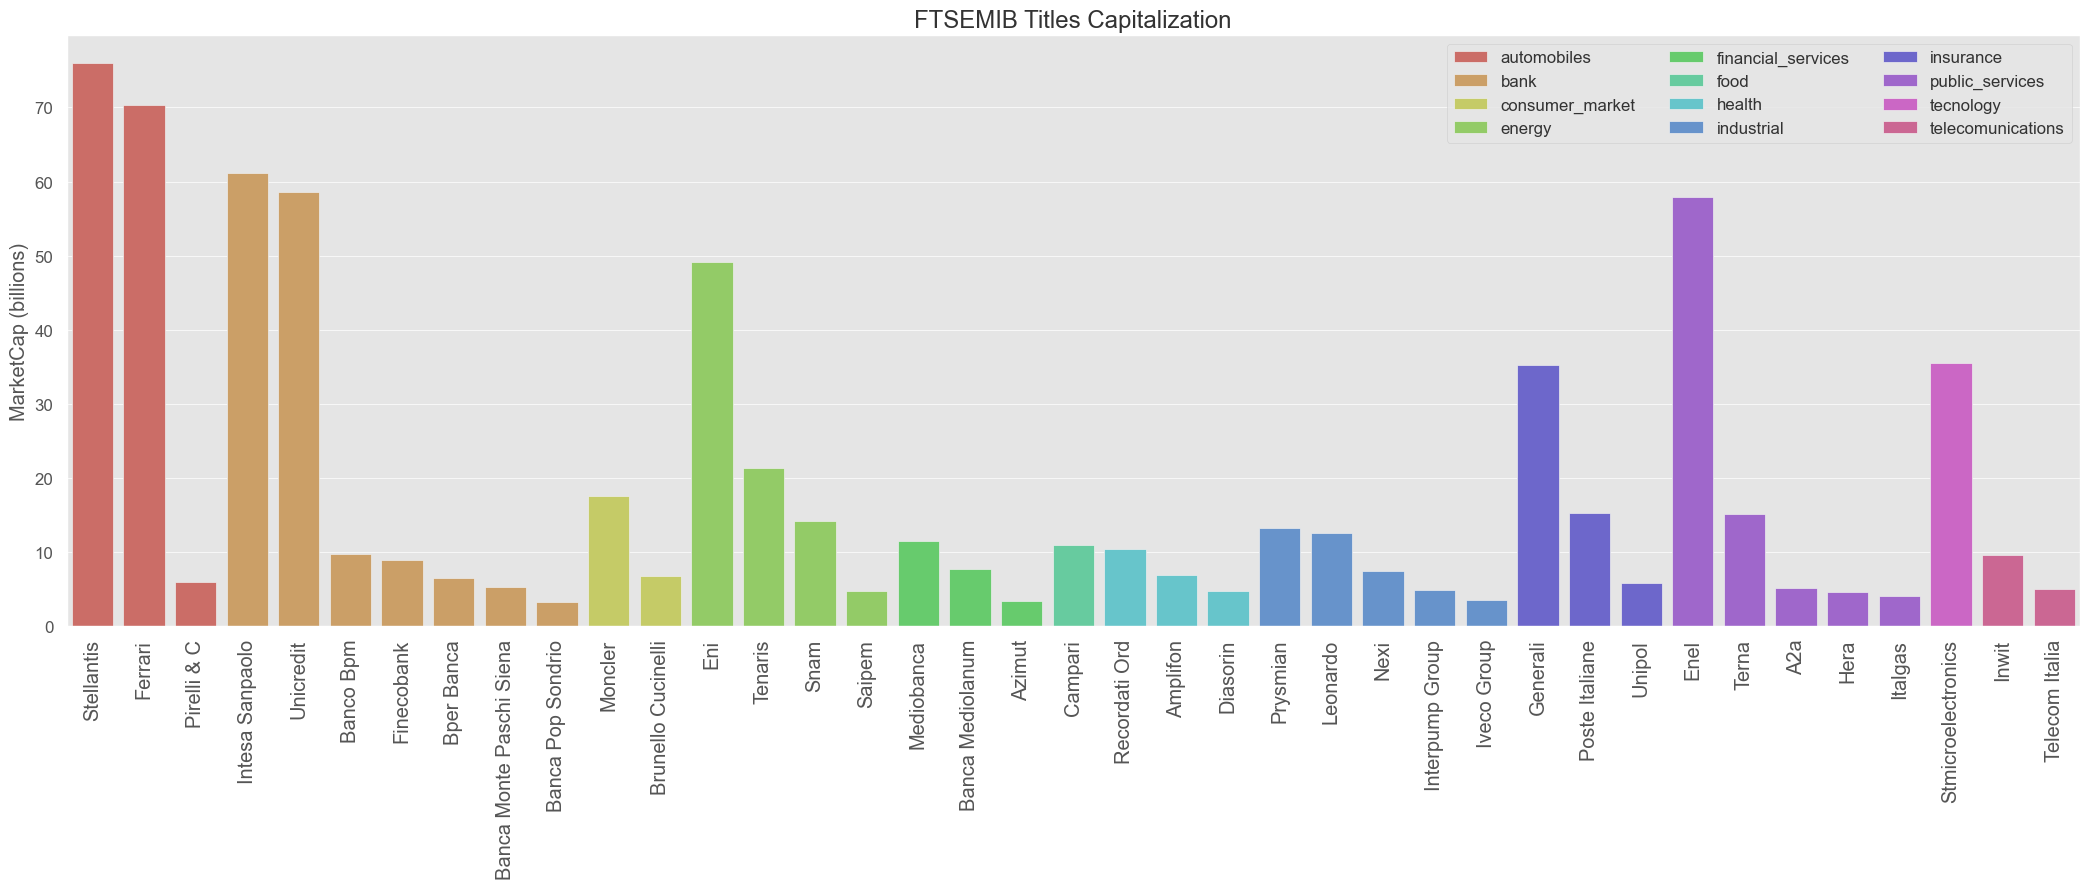

In [79]:
fig, ax = plt.subplots(tight_layout=True, figsize=(21, 9))

sns.barplot(data=data, x="name", y=data["marketCap"]/1_000_000_000, hue="sector", ax=ax)

ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90, ha='center', fontsize="x-large")
ax.set_title("FTSEMIB Titles Capitalization", fontsize="xx-large")
ax.set_xlabel("", fontsize="x-large")
ax.set_ylabel("MarketCap (billions)", fontsize="x-large")
ax.legend(ncols=3)
plt.show()

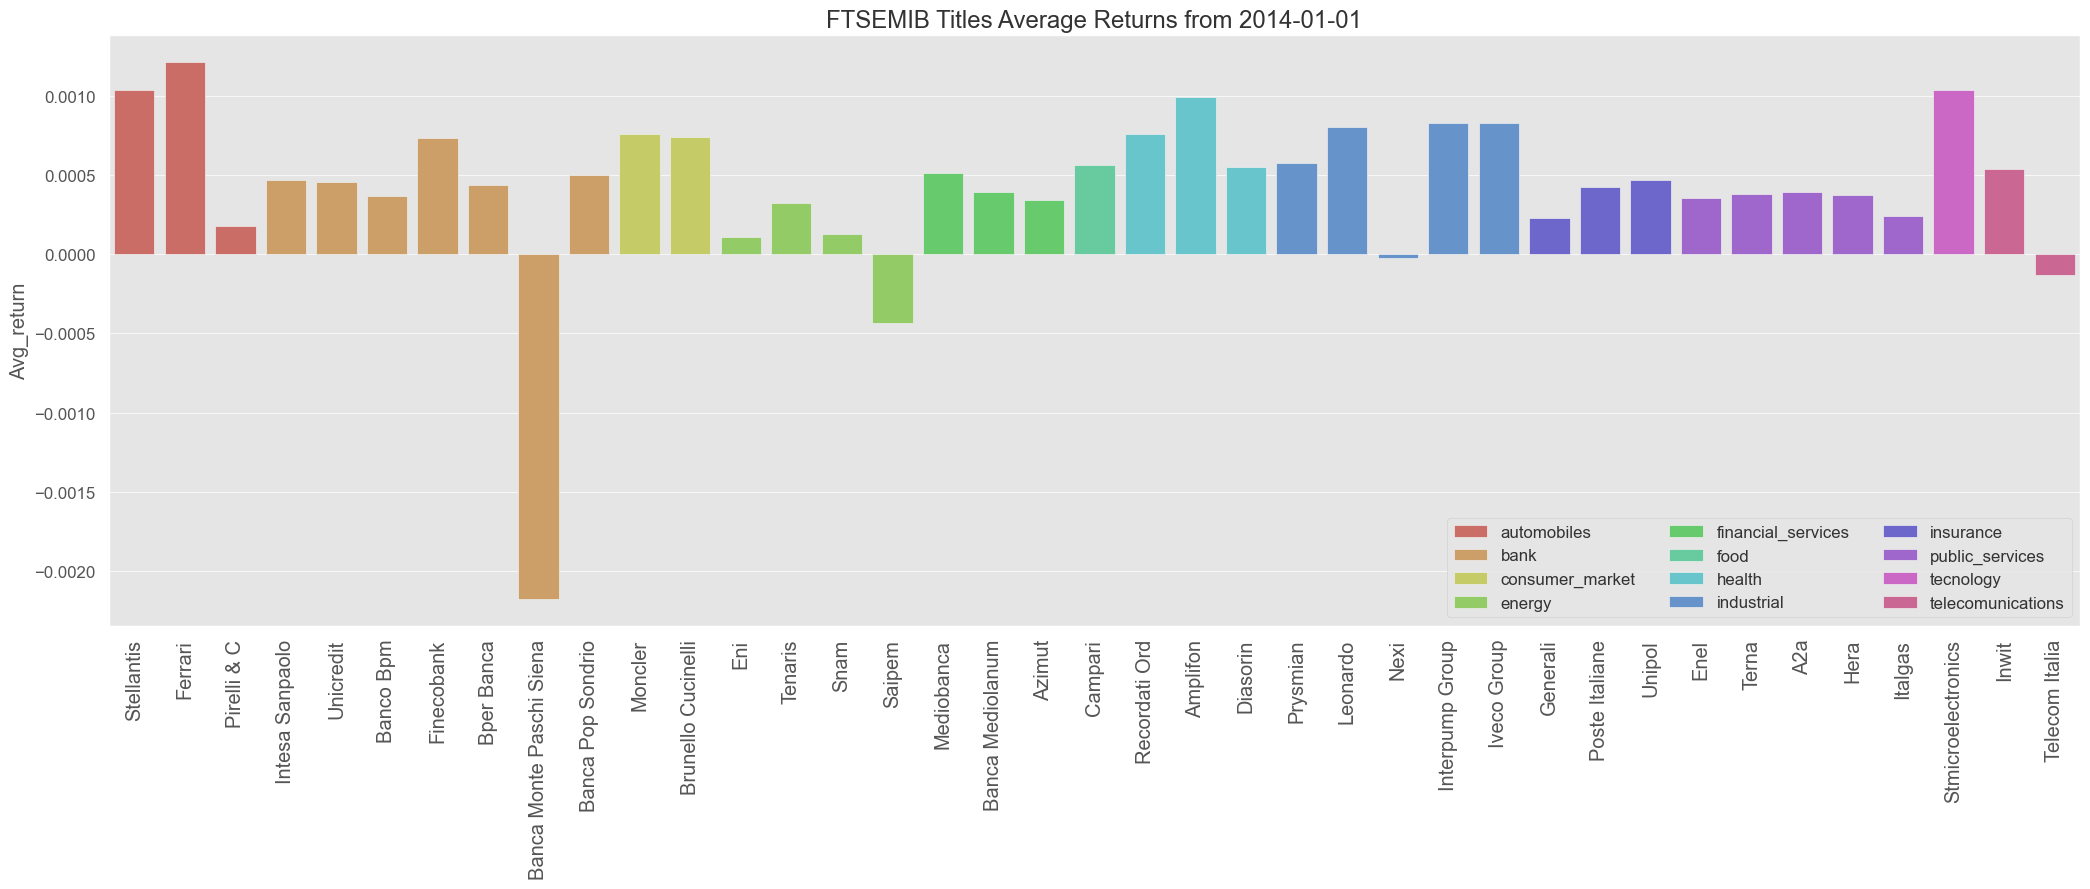

In [78]:
fig, ax = plt.subplots(tight_layout=True, figsize=(21, 9))

sns.barplot(data=data, x="name", y="avg_return", hue="sector", ax=ax)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90, ha='center', fontsize="x-large")
ax.set_title("FTSEMIB Titles Average Returns from " + starting_period, fontsize="xx-large")
ax.set_xlabel("", fontsize="x-large")
ax.set_ylabel("Avg_return", fontsize="x-large")
ax.legend(ncols=3)
plt.show()

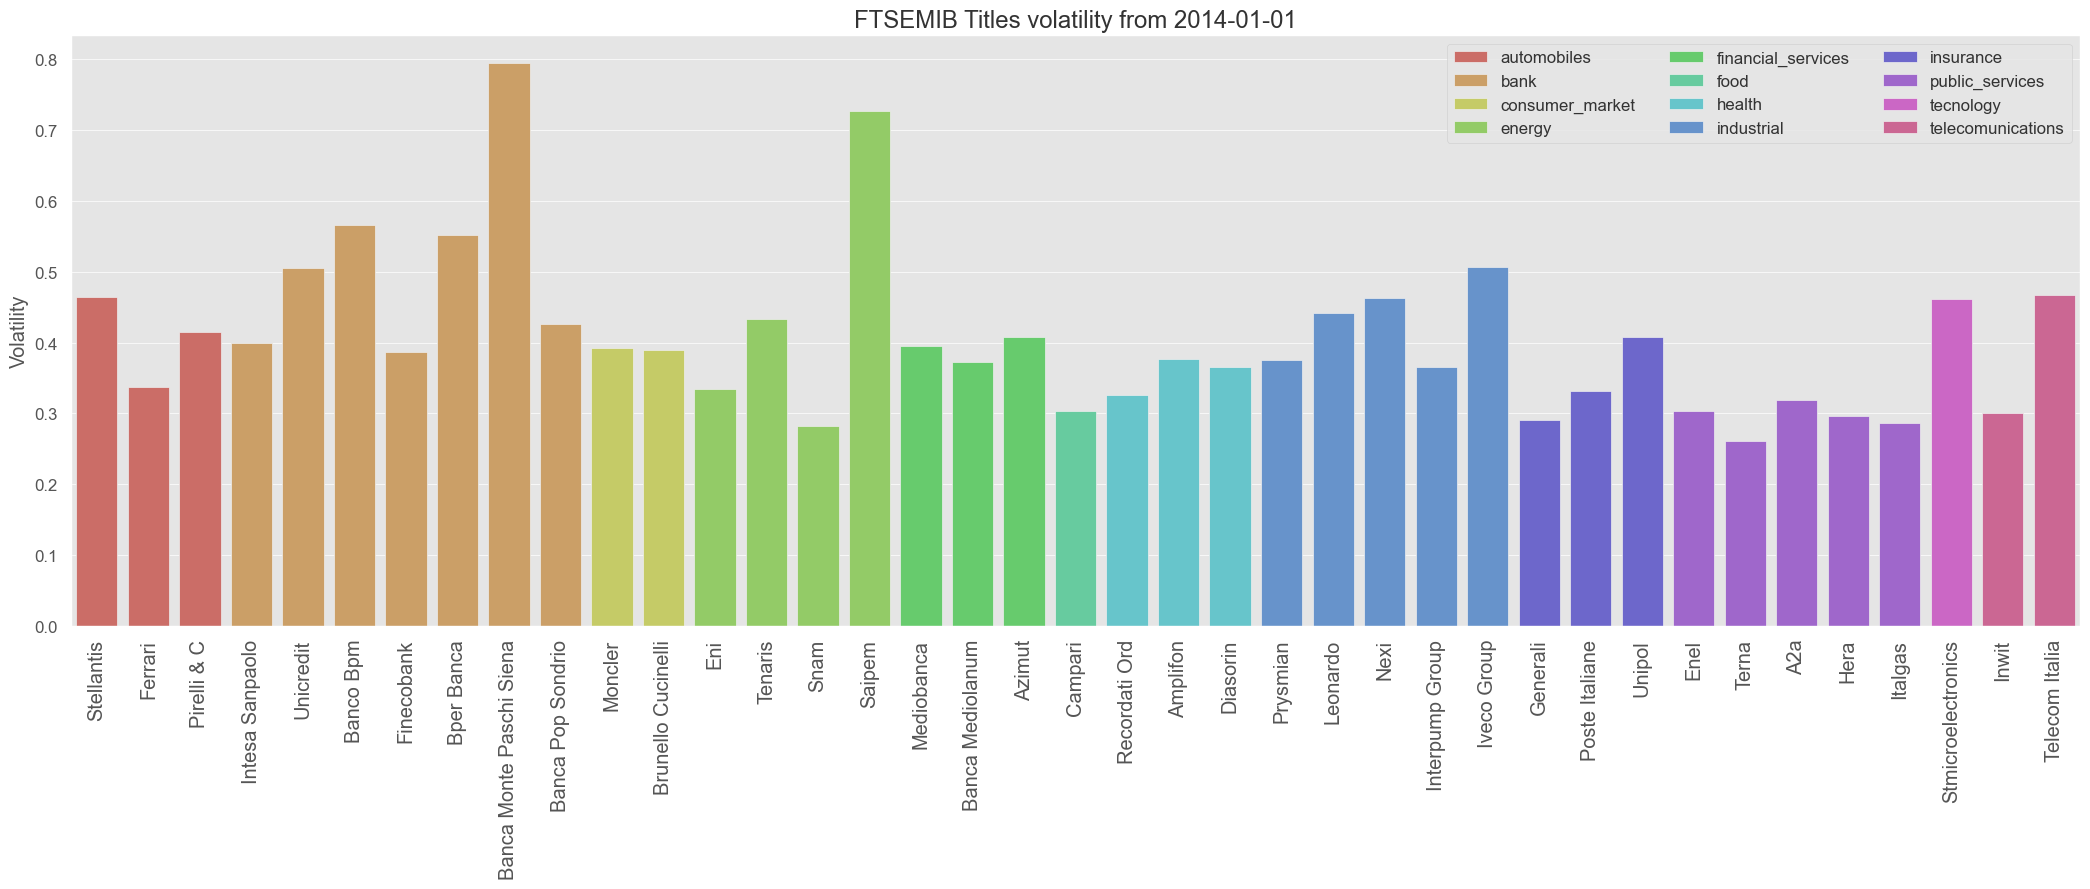

In [31]:
fig, ax = plt.subplots(tight_layout=True, figsize=(21, 9))

sns.barplot(data=data, x="name", y="volatility", hue="sector", ax=ax)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90, ha='center', fontsize="x-large")
ax.set_title("FTSEMIB Titles volatility from " + starting_period, fontsize="xx-large")
ax.set_xlabel("", fontsize="x-large")
ax.set_ylabel("Volatility", fontsize="x-large")
ax.legend(ncols=3)
plt.show()

In [80]:
ferrari = yf.Ticker("RACE.MI")

In [81]:
ferrari.history(start=starting_period)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00+01:00,40.330936,40.978106,38.924043,40.959347,4982727,0.0,0.0
2016-01-05 00:00:00+01:00,41.531480,42.516308,40.949965,41.822239,2554024,0.0,0.0
2016-01-06 00:00:00+01:00,42.169274,43.322926,41.090658,41.831619,4047421,0.0,0.0
2016-01-07 00:00:00+01:00,40.659209,41.681552,39.974522,40.471626,2258307,0.0,0.0
2016-01-08 00:00:00+01:00,40.284040,40.462245,37.582804,38.023632,2456643,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-04 00:00:00+02:00,385.100006,388.600006,381.799988,387.100006,263388,0.0,0.0
2024-04-05 00:00:00+02:00,382.299988,388.200012,379.799988,387.500000,300663,0.0,0.0
2024-04-08 00:00:00+02:00,387.000000,392.600006,386.100006,390.799988,177845,0.0,0.0


In [82]:
ferrari.dividends

Date
2016-05-23 00:00:00+02:00    0.460
2017-04-24 00:00:00+02:00    0.635
2018-04-23 00:00:00+02:00    0.710
2019-04-23 00:00:00+02:00    1.030
2020-04-20 00:00:00+02:00    1.130
2021-04-19 00:00:00+02:00    0.867
2022-04-19 00:00:00+02:00    1.362
2023-04-24 00:00:00+02:00    1.810
Name: Dividends, dtype: float64